# Mrinmayee Ghosh
# Task 1 

02

INTERMEDIATE LEVEL TASK

# Prediction using Decision Tree  Algorithm :

Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  


In [108]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size:18px;
</style>

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt # seaborn is bases on matplot
sns.set(color_codes=True) # adds a nice background
%matplotlib inline # tells python to actually display the graphs
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

UsageError: unrecognized arguments: # tells python to actually display the graphs


In [110]:
Data = pd.read_csv('Iris (1).csv')
Data.shape

(150, 6)

In [112]:
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Performing EDA

In [113]:
Data.shape

(150, 6)

In [114]:
Data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [115]:
# checking for null values
Data.isnull().values.any()

False

In [116]:
Data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [117]:
Data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Visualization

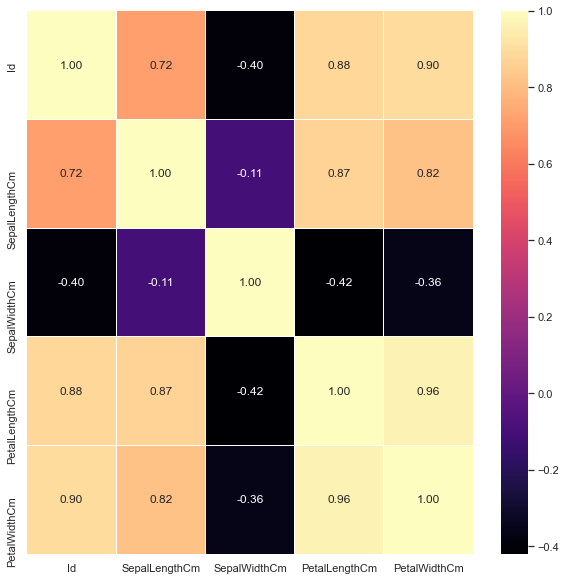

In [118]:
# heat map for correlation
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(Data.corr(),ax=ax, annot=True,linewidths=0.05, fmt = '.2f', cmap="magma")
plt.show()

# conclusion :
# overall the data is higly correlated
# petalLength and SepalLength are highly correlated
# petalLength and petalWidth are highly correlated
# sepalLength and sepalWidth are poorly correlated
# sepalWidth and petalLength are very poorly correlated

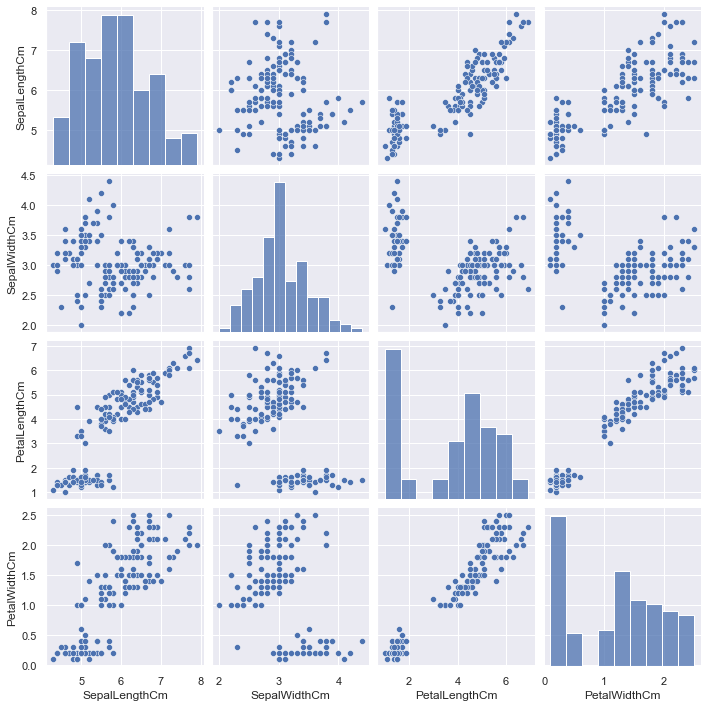

In [119]:
# pairplot
sns.pairplot(Data.iloc[:,1:])

In [120]:
# check the skewness
Data.skew()x

SyntaxError: invalid syntax (<ipython-input-120-463ab4a132ba>, line 2)

In [ ]:
# dublicates
dupes = Data.duplicated()
dupes
# there are no duplicates

In [ ]:
plt.figure(figsize=(16,6))
sns.pairplot(Data.iloc[:,1:])

# observation
1. petal length is rightly skiwed
2. petal width is also rightly skewed
3. sepal length and sepal width are normally distributed
4. there is a linear pair relationship b/w petal width and petal length

In [ ]:
# boxplot
Data.boxplot(column='PetalLengthCm',figsize=(8,8))

# conclusion
1. Q1 = 1.7
2. Q2 = 4.4
3. Q3 = 5

In [ ]:
# check measure of dispersion
Data.quantile(0.75)- Data.quantile(0.25)

In [ ]:
sns.displot(Data['SepalLengthCm'])

# Univariate and Bivariate plots

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Data.hist(figsize=(20,30))

In [ ]:
import seaborn as sns

sns.boxplot(x="SepalWidthCm", y="PetalLengthCm", data=Data)

In [ ]:
pd.crosstab(Data['SepalWidthCm'],Data['PetalLengthCm'] )

In [ ]:
sns.countplot(x="SepalWidthCm", hue="Species", data=Data)

In [ ]:
sns.countplot(x="PetalWidthCm", hue="Species", data=Data)

C:\Users\Mrinmayee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

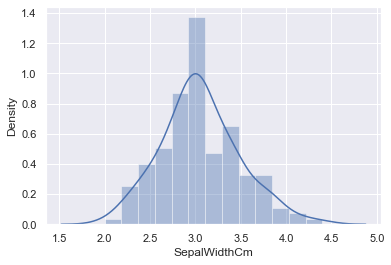

In [121]:
sns.distplot(Data['SepalWidthCm'])

C:\Users\Mrinmayee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

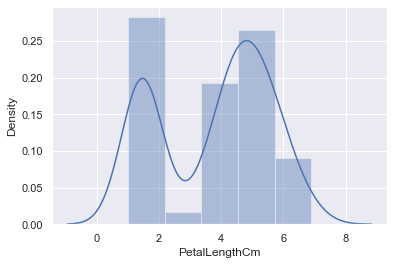

In [122]:
sns.distplot(Data['PetalLengthCm'])

# Decision Tree

In [123]:
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [124]:
Data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [126]:
x = Data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = Data['Species'].values

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=1)

In [128]:
# Build Decision tree Model 
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [139]:
# scorring our decision tree

print(dTree.score(x_test,y_test))


0.9555555555555556


# Accuracy = 95%

In [134]:
y_pred = dTree.predict(x_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor']


# Visualizing the Tree

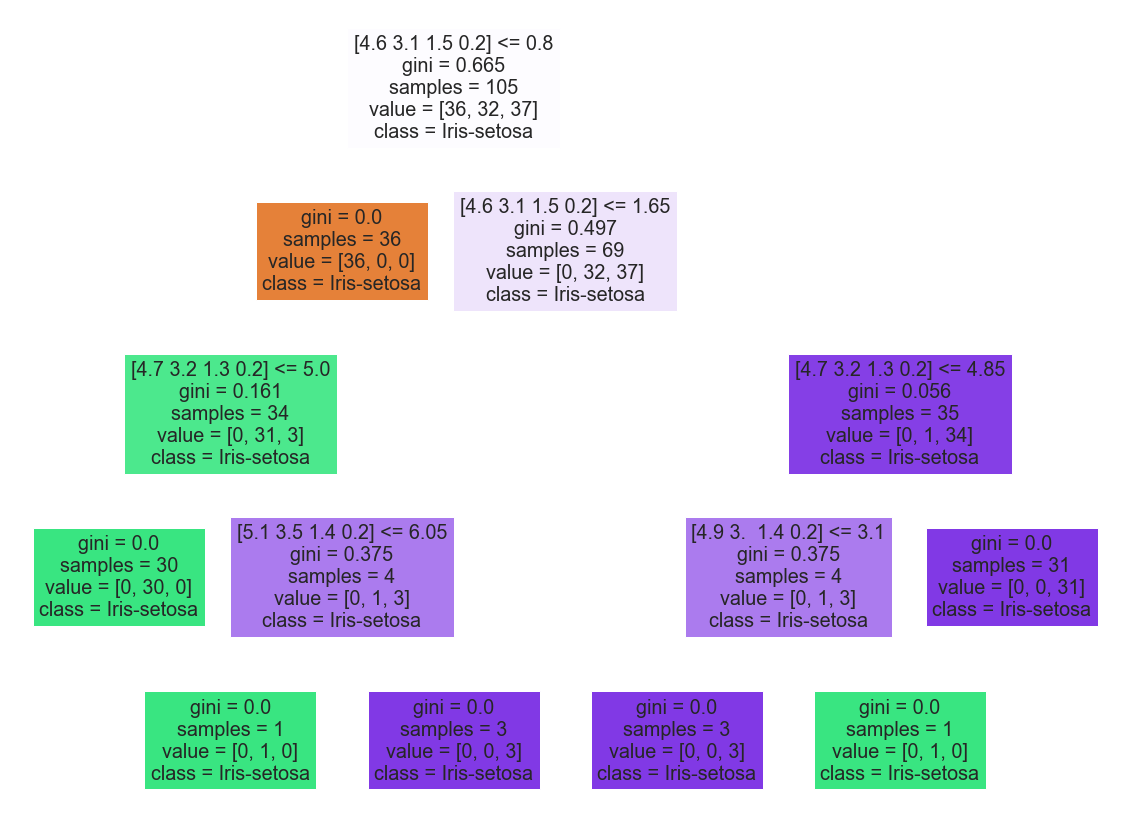

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(dTree, 
                   feature_names=x,  
                   class_names=y,
                   filled=True)